Práctica 4: Resolviendo el Problema XOR utilizando un Perceptrón Multicapa
Redes Neuronales y Aprendizaje Profundo
Rodrigo F. Román Godínez
Flores Lara Alberto
5BV1

Objetivos:
1. Implementar de forma manual la solución del problema XOR.
2. Resolver el problema XOR utilizando descenso de gradiente.
3. Modificar el perceptrón para utilizar la función de activación tanh.
4. Implementar la función de costo con Binary Cross Entropy.

Parte 2: Resolver el Problema XOR con Descenso de Gradiente
Instrucciones:
En esta sección, debes implementar el algoritmo de retropropagación desde cero,
entrenando el perceptrón multicapa con descenso de gradiente para resolver el problema
XOR.
Pasos:
1. Inicializa pesos y sesgos aleatorios.

2. Implementa las funciones de propagación hacia adelante y hacia atrás
(retropropagación).
3. Entrena la red utilizando la regla de aprendizaje con descenso de gradiente.
4. Calcula el error en cada época y asegúrate de que el error converge hacia cero.
5. Muestra la evolución del error a lo largo de las épocas.
6. Grafica las salidas de cada neurona de la capa oculta y la salida final para
observar su comportamiento.

In [288]:
import numpy as np
import matplotlib.pyplot as plt

In [289]:
#Definición de la clase MLP
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Inicialización de pesos y sesgos aleatorios
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(1, hidden_size)
        self.bias2 = np.random.rand(1, output_size)
        self.learning_rate = learning_rate
    
    # Función sigmoide
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #Derivada de la función sigmoide
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    #Paso hacia adelante
    def forward(self, x):
        self.layer1 = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        output = self.sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        return output
    
    # Retropropagación del error
    def backward(self, x, y, output):
        # Calculo de los errores
        output_error = output - y
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.layer1)

        # Actualización de pesos y sesgos con tasa de aprendizaje
        self.weights2 -= self.learning_rate * np.dot(self.layer1.T, output_delta)
        self.weights1 -= self.learning_rate * np.dot(x.T, hidden_delta)
        self.bias2 -= self.learning_rate * np.sum(output_delta, axis=0)
        self.bias1 -= self.learning_rate * np.sum(hidden_delta, axis=0)
    
    # Función de entrenamiento
    def train(self, x, y, iterations):
        errors = []
        for _ in range(iterations):
            output = self.forward(x)
            self.backward(x, y, output)
            # Calculamos el error (error cuadrático medio)
            error = np.mean(np.square(y - output))
            errors.append(error)
        return errors


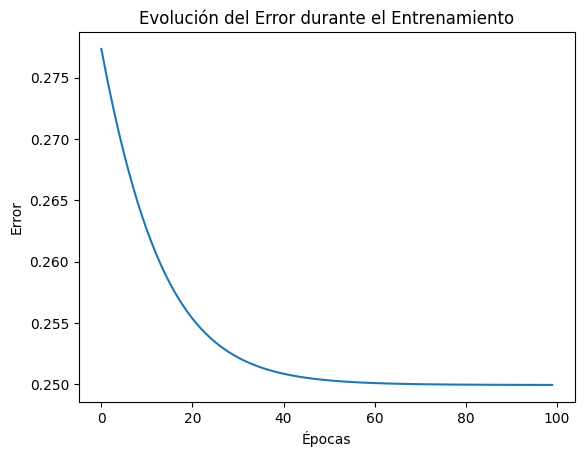

In [290]:
# Datos de entrada y salida del problema XOR
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Inicialización y entrenamiento del MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
errors = mlp.train(x, y, 100)

# Graficamos la evolución del error
plt.plot(errors)
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.title('Evolución del Error durante el Entrenamiento')
plt.show()


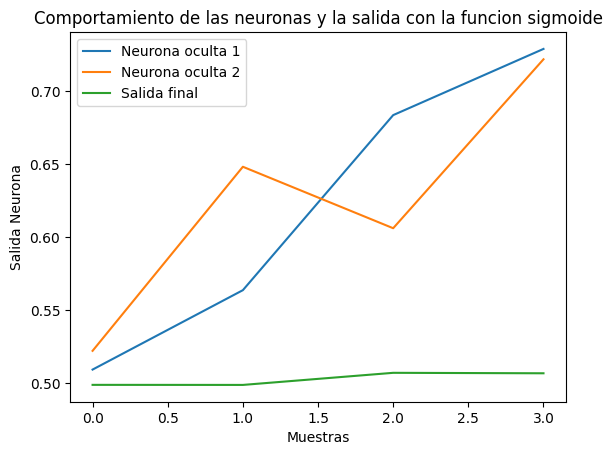

In [291]:
# Graficar las salidas de las neuronas de la capa oculta y la salida final
hidden_outputs = []
final_outputs = []

for sample in x:
    mlp.forward(sample)
    hidden_outputs.append(mlp.layer1.flatten())  # Salida de la capa oculta
    final_outputs.append(mlp.forward(sample).flatten())  # Salida final

# Convertimos las listas a arrays de NumPy
hidden_outputs = np.array(hidden_outputs)
final_outputs = np.array(final_outputs)

# Graficar salidas de las neuronas de la capa oculta y la salida final
plt.figure()
plt.plot(hidden_outputs[:, 0], label='Neurona oculta 1')
plt.plot(hidden_outputs[:, 1], label='Neurona oculta 2')
plt.plot(final_outputs, label='Salida final')
plt.xlabel('Muestras')
plt.ylabel('Salida Neurona')
plt.title('Comportamiento de las neuronas y la salida con la funcion sigmoide')
plt.legend()
plt.show()


Parte 3: Usar tanh como Función de Activación
Instrucciones:
En esta parte, modificarás el perceptrón multicapa para utilizar la función tanh como
activación en lugar de la función sigmoide.
Pasos:
1. Modifica la función de activación a tanh.
2. Ajusta la derivada de la nueva función de activación.
3. Reentrena la red y compara los resultados con los obtenidos usando sigmoid.

In [292]:
#Definición de la clase MLP
class MLP_Tan:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Inicialización de pesos y sesgos aleatorios
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(1, hidden_size)
        self.bias2 = np.random.rand(1, output_size)
        self.learning_rate = learning_rate
    
    # Función tangente
    def tangente(self, z):
        return np.tanh(z)
    
    #Derivada de la función tangente
    def tangente_derivative(self, z):
        return 1 - np.tanh(z) ** 2
    
    #Paso hacia adelante
    def forward(self, x):
        self.layer1 = self.tangente(np.dot(x, self.weights1) + self.bias1)
        output = self.tangente(np.dot(self.layer1, self.weights2) + self.bias2)
        return output
    
    # Retropropagación del error
    def backward(self, x, y, output):
        # Calculo de los errores
        output_error = output - y
        output_delta = output_error * self.tangente_derivative(output)

        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * self.tangente_derivative(self.layer1)

        # Actualización de pesos y sesgos con tasa de aprendizaje
        self.weights2 -= self.learning_rate * np.dot(self.layer1.T, output_delta)
        self.weights1 -= self.learning_rate * np.dot(x.T, hidden_delta)
        self.bias2 -= self.learning_rate * np.sum(output_delta, axis=0)
        self.bias1 -= self.learning_rate * np.sum(hidden_delta, axis=0)
    
    # Función de entrenamiento
    def train(self, x, y, iterations):
        errors = []
        for _ in range(iterations):
            output = self.forward(x)
            self.backward(x, y, output)
            # Calculamos el error (error cuadrático medio)
            error = np.mean(np.square(y - output))
            errors.append(error)
        return errors


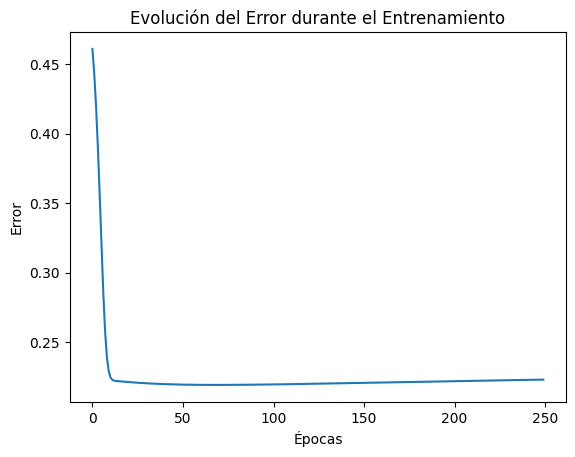

In [293]:
# Inicialización y entrenamiento del MLP
mlp = MLP_Tan(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
errors = mlp.train(x, y, 250)

# Graficamos la evolución del error
plt.plot(errors)
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.title('Evolución del Error durante el Entrenamiento')
plt.show()

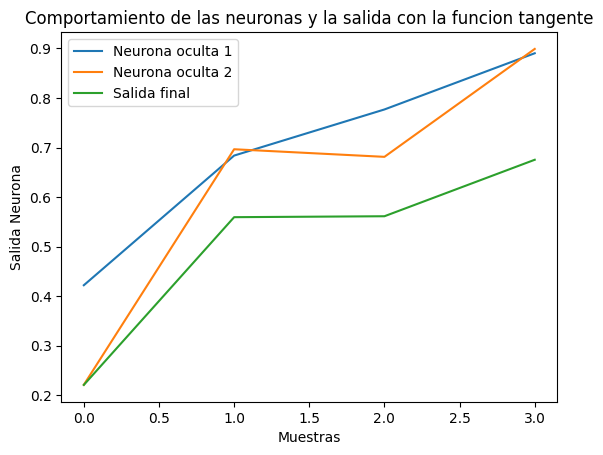

In [294]:
# Graficar las salidas de las neuronas de la capa oculta y la salida final
hidden_outputs = []
final_outputs = []

for sample in x:
    mlp.forward(sample)
    hidden_outputs.append(mlp.layer1.flatten())  # Salida de la capa oculta
    final_outputs.append(mlp.forward(sample).flatten())  # Salida final

# Convertimos las listas a arrays de NumPy
hidden_outputs = np.array(hidden_outputs)
final_outputs = np.array(final_outputs)

# Graficar salidas de las neuronas de la capa oculta y la salida final
plt.figure()
plt.plot(hidden_outputs[:, 0], label='Neurona oculta 1')
plt.plot(hidden_outputs[:, 1], label='Neurona oculta 2')
plt.plot(final_outputs, label='Salida final')
plt.xlabel('Muestras')
plt.ylabel('Salida Neurona')
plt.title('Comportamiento de las neuronas y la salida con la funcion tangente')
plt.legend()
plt.show()

En general, la funcion tangente parece tener un mejor rendimiento en términos de velocidad de convergencia y rango de valores de activación, aunque puede ser un poco más inestable. La sigmoide, por otro lado, es más estable pero tiende a aprender más lento. 

Parte 4: Implementar Binary Cross Entropy
Instrucciones:
En esta parte, modificarás la función de costo para que utilice la entropía cruzada binaria,
lo cual es más adecuado para tareas de clasificación binaria como XOR.
Pasos:
1. - Implementa la función de costo binary cross entropy.

In [296]:
# Definición de la clase MLP con entropía cruzada binaria
class MLP_Tan_Binary:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Inicialización de pesos y sesgos aleatorios
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.weights2 = np.random.rand(hidden_size, output_size)
        self.bias1 = np.random.rand(1, hidden_size)
        self.bias2 = np.random.rand(1, output_size)
        self.learning_rate = learning_rate
    
    # Función tangente
    def tangente(self, z):
        return np.tanh(z)
    
    # Derivada de la función tangente
    def tangente_derivative(self, z):
        return 1 - np.tanh(z) ** 2
    
    # Paso hacia adelante
    def forward(self, x):
        self.layer1 = self.tangente(np.dot(x, self.weights1) + self.bias1)
        output = self.tangente(np.dot(self.layer1, self.weights2) + self.bias2)
        return output
    
    # Retropropagación del error
    def backward(self, x, y, output):
        # Calculo de los errores
        output_error = output - y
        output_delta = output_error * self.tangente_derivative(output)

        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * self.tangente_derivative(self.layer1)

        # Actualización de pesos y sesgos con tasa de aprendizaje
        self.weights2 -= self.learning_rate * np.dot(self.layer1.T, output_delta)
        self.weights1 -= self.learning_rate * np.dot(x.T, hidden_delta)
        self.bias2 -= self.learning_rate * np.sum(output_delta, axis=0)
        self.bias1 -= self.learning_rate * np.sum(hidden_delta, axis=0)
    
    # Función de costo de entropía cruzada binaria
    def binary_cross_entropy(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost
    
    # Función de entrenamiento
    def train(self, x, y, iterations):
        errors = []
        for _ in range(iterations):
            output = self.forward(x)
            self.backward(x, y, output)
            # Calculamos el error utilizando entropía cruzada binaria
            error = self.binary_cross_entropy(y, output)
            errors.append(error)
        return errors


In [297]:
# Crear el modelo MLP
mlp = MLP_Tan_Binary(input_size=2, hidden_size=2, output_size=1)

# Entrenar el modelo con entropía cruzada binaria
errors = mlp.train(x, y, iterations=10000)

# Mostrar el error final
print(f"Error final de entropía cruzada binaria: {errors[-1]}")

Error final de entropía cruzada binaria: 0.0004825435855794447
